In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
data = pd.read_csv('/content/drive/MyDrive/IIIT/Various_datasets/MBTI 500.csv')
print(data.head())
print(data.shape)

                                               posts  type
0  know intj tool use interaction people excuse a...  INTJ
1  rap music ehh opp yeah know valid well know fa...  INTJ
2  preferably p hd low except wew lad video p min...  INTJ
3  drink like wish could drink red wine give head...  INTJ
4  space program ah bad deal meing freelance max ...  INTJ
(106067, 2)


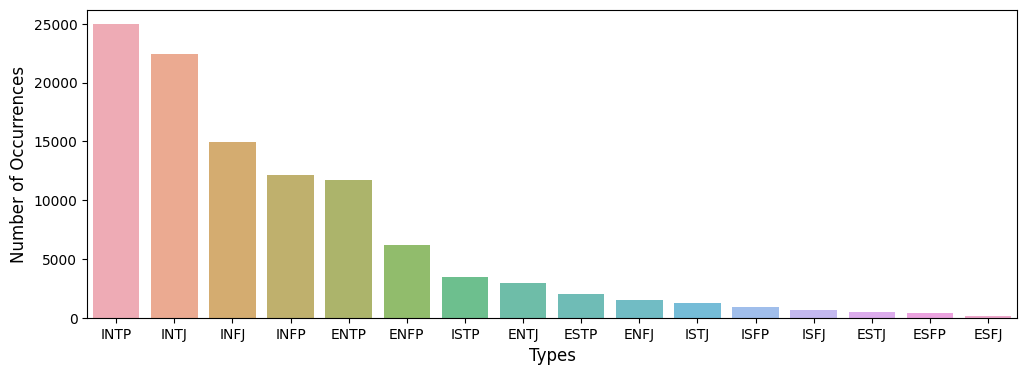

In [3]:
per_types = data['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=per_types.index, y=per_types.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

In [4]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
l.fit(data['type'])
LabelEncoder()
print(list(l.classes_))

['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']


In [5]:
#distributing data into different classes
from sklearn.utils import resample
data['label'] = l.transform(data["type"])

#dividing labels into diffrent dataframe
df_0=data[data['label']==0]
df_1=data[data['label']==1]
df_2=data[data['label']==2]
df_3=data[data['label']==3]
df_4=data[data['label']==4]
df_5=data[data['label']==5]
df_6=data[data['label']==6]
df_7=data[data['label']==7]
df_8=data[data['label']==8]
df_9=data[data['label']==9]
df_10=data[data['label']==10]
df_11=data[data['label']==11]
df_12=data[data['label']==12]
df_13=data[data['label']==13]
df_14=data[data['label']==14]
df_15=data[data['label']==15]

In [6]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0

    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E incorrect')

    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S incorrect')

    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F incorrect')

    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P incorrect')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J })

data = data.join(data.apply (lambda row: get_types (row),axis=1))
data

,posts,type,label,IE,NS,TF,JP
0,know intj tool use interaction people excuse a...,INTJ,10,1,1,1,1
1,rap music ehh opp yeah know valid well know fa...,INTJ,10,1,1,1,1
2,preferably p hd low except wew lad video p min...,INTJ,10,1,1,1,1
3,drink like wish could drink red wine give head...,INTJ,10,1,1,1,1
4,space program ah bad deal meing freelance max ...,INTJ,10,1,1,1,1
...,...,...,...,...,...,...,...
106062,stay frustrate world life want take long nap w...,INFP,9,1,1,0,0
106063,fizzle around time mention sure mistake thing ...,INFP,9,1,1,0,0
106064,schedule modify hey w intp strong wing underst...,INFP,9,1,1,0,0
106065,enfj since january busy schedule able spend li...,INFP,9,1,1,0,0


In [7]:
print ("Introversion (I) /  Extroversion (E):\t", data['IE'].value_counts()[0], " / ", data['IE'].value_counts()[1])
print ("Intuition (N) / Sensing (S):\t\t", data['NS'].value_counts()[0], " / ", data['NS'].value_counts()[1])
print ("Thinking (T) / Feeling (F):\t\t", data['TF'].value_counts()[0], " / ", data['TF'].value_counts()[1])
print ("Judging (J) / Perceiving (P):\t\t", data['JP'].value_counts()[0], " / ", data['JP'].value_counts()[1])

Introversion (I) /  Extroversion (E):	 25390  /  80677
Intuition (N) / Sensing (S):		 9201  /  96866
Thinking (T) / Feeling (F):		 36864  /  69203
Judging (J) / Perceiving (P):		 61632  /  44435


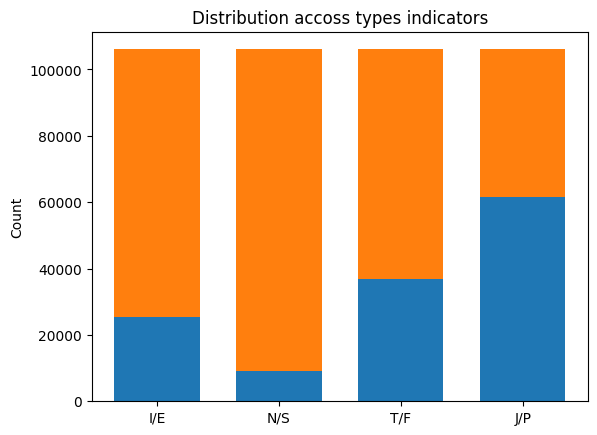

In [8]:
N = 4
but = (data['IE'].value_counts()[0], data['NS'].value_counts()[0], data['TF'].value_counts()[0], data['JP'].value_counts()[0])
top = (data['IE'].value_counts()[1], data['NS'].value_counts()[1], data['TF'].value_counts()[1], data['JP'].value_counts()[1])

ind = np.arange(N)    # the x locations for the groups
width = 0.7      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, but, width)
p2 = plt.bar(ind, top, width, bottom=but)

plt.ylabel('Count')
plt.title('Distribution accoss types indicators')
plt.xticks(ind, ('I/E',  'N/S', 'T/F', 'J/P',))

plt.show()

In [9]:
b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    # transform mbti to binary vector

    return [b_Pers[l] for l in personality]

def translate_back(personality):
    # transform binary vector to mbti personality

    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

d = data.head(10)
print(d)
list_personality_bin = np.array([translate_personality(p) for p in d.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)

                                               posts  type  label  IE  NS  TF  \
0  know intj tool use interaction people excuse a...  INTJ     10   1   1   1   
1  rap music ehh opp yeah know valid well know fa...  INTJ     10   1   1   1   
2  preferably p hd low except wew lad video p min...  INTJ     10   1   1   1   
3  drink like wish could drink red wine give head...  INTJ     10   1   1   1   
4  space program ah bad deal meing freelance max ...  INTJ     10   1   1   1   
5  loose stop overthinking everything ruin friend...  INTJ     10   1   1   1   
6  often men one put chance get burn otherwise no...  INTJ     10   1   1   1   
7  early definitely relate quiet self destruction...  INTJ     10   1   1   1   
8  one full list would impossibly long quotable f...  INTJ     10   1   1   1   
9  technique information power share unless absol...  INTJ     10   1   1   1   

   JP  
0   1  
1   1  
2   1  
3   1  
4   1  
5   1  
6   1  
7   1  
8   1  
9   1  
Binarize MBTI list: 

In [10]:

##### Compute list of subject with Type | list of comments
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize

# We want to remove these from the psosts
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']

unique_type_list = [x.lower() for x in unique_type_list]

# Lemmatize
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

# Cache the stop words for speed
cachedStopWords = stopwords.words("english")

def pre_process_data(data, remove_stop_words=True, remove_mbti_profiles=True):

    list_personality = []
    list_posts = []
    len_data = len(data)
    i=0

    for row in data.iterrows():
        i+=1
        if (i % 10000 == 0 or i == 1 or i == len_data):
            print("%s of %s rows" % (i, len_data))

        ##### Remove and clean comments
        posts = row[1].posts
        temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)
        temp = re.sub("[^a-zA-Z]", " ", temp)
        temp = re.sub(' +', ' ', temp).lower()
        if remove_stop_words:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in cachedStopWords])
        else:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])

        if remove_mbti_profiles:
            for t in unique_type_list:
                temp = temp.replace(t,"")

        type_labelized = translate_personality(row[1].type)
        list_personality.append(type_labelized)
        list_posts.append(temp)

    list_posts = np.array(list_posts)
    list_personality = np.array(list_personality)
    return list_posts, list_personality

In [12]:
list_posts, list_personality  = pre_process_data(data, remove_stop_words=True)

1 of 106067 rows
10000 of 106067 rows
20000 of 106067 rows
30000 of 106067 rows
40000 of 106067 rows
50000 of 106067 rows
60000 of 106067 rows
70000 of 106067 rows
80000 of 106067 rows
90000 of 106067 rows
100000 of 106067 rows
106067 of 106067 rows


In [13]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

# Posts to a matrix of token counts
countizer = CountVectorizer(analyzer="word", max_features=1500, tokenizer=None, preprocessor=None, stop_words=None,max_df=0.7,min_df=0.1)

# Learn the vocabulary dictionary and return term-document matrix
print("CountVectorizer...")
X_cnt = countizer.fit_transform(list_posts)

# Transform the count matrix to a normalized tf or tf-idf representation
tfizer = TfidfTransformer()

print("Tf-idf...")
# Learn the idf vector (fit) and transform a count matrix to a tf-idf representation
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()

CountVectorizer...
Tf-idf...


In [15]:
feature_names = list(enumerate(countizer.get_feature_names_out()))
feature_names

type_indicators = [ "IE: Introversion (I) / Extroversion (E)", "NS: Intuition (N) / Sensing (S)",
                   "FT: Feeling (F) / Thinking (T)", "JP: Judging (J) / Perceiving (P)"  ]

for l in range(len(type_indicators)):
    print(type_indicators[l])

IE: Introversion (I) / Extroversion (E)
NS: Intuition (N) / Sensing (S)
FT: Feeling (F) / Thinking (T)
JP: Judging (J) / Perceiving (P)


In [16]:
# Create RNN Model
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset


class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()

        # Number of hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.layer_dim = layer_dim

        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='relu')

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):

        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))

        # One time step
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

seq_dim = 28
loss_list = []
iteration_list = []
accuracy_list = []
count = 0

# batch_size, epoch and iteration
batch_size = 100
num_epochs = 5

# Pytorch train and test sets
train = TensorDataset(X_train,y_train)
test = TensorDataset(X_test,y_test)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# Create RNN
input_dim = 28    # input dimension
hidden_dim = 100  # hidden layer dimension
layer_dim = 1     # number of hidden layers
output_dim = 16   # output dimension

model = RNNModel(input_dim, hidden_dim, layer_dim, output_dim)

# Cross Entropy Loss
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.05
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Posts in tf-idf representation
X = X_tfidf

# Let's train type indicator individually
for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))

    # Let's train type indicator individually
    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1211)
    # Clear gradients
    optimizer.zero_grad()

    # Forward propagation
    outputs = model(train)

    # Calculate softmax and ross entropy loss
    loss = error(outputs, labels)

    # Calculating gradients
    loss.backward()

    # Update parameters
    optimizer.step()

    count += 1

    if count % 250 == 0:
      # Calculate Accuracy
      correct = 0
      total = 0
      # Iterate through test dataset
            for images, labels in test_loader:
                images = Variable(images.view(-1, seq_dim, input_dim))

                # Forward propagation
                outputs = model(images)

                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]

                # Total number of labels
                total += labels.size(0)

                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)

            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.item(), accuracy))